In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\ganes\\Downloads\\NBA Datasheet_Cumul.csv")

In [3]:
df = df.drop(["Rk", "Div", "Team", "W", "L", "Champions", "Conf"], axis = 1)

In [4]:
df.corr()

,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
W/L%,1.000000,0.966769,0.614414,-0.561982,0.967469,0.964164,0.595767,-0.550681,0.964797
MOV,0.966769,1.000000,0.634027,-0.580482,0.998772,0.996740,0.614368,-0.568561,0.995479
ORtg,0.614414,0.634027,1.000000,0.259830,0.632828,0.641209,0.999178,0.270130,0.640113
DRtg,-0.561982,-0.580482,0.259830,1.000000,-0.583271,-0.568930,0.283672,0.996116,-0.571533
NRtg,0.967469,0.998772,0.632828,-0.583271,1.000000,0.995548,0.613019,-0.571491,0.996714
MOV/A,0.964164,0.996740,0.641209,-0.568930,0.995548,1.000000,0.622995,-0.563533,0.998798
ORtg/A,0.595767,0.614368,0.999178,0.283672,0.613019,0.622995,1.000000,0.293412,0.621746
DRtg/A,-0.550681,-0.568561,0.270130,0.996116,-0.571491,-0.563533,0.293412,1.000000,-0.566318
NRtg/A,0.964797,0.995479,0.640113,-0.571533,0.996714,0.998798,0.621746,-0.566318,1.000000


<AxesSubplot: >

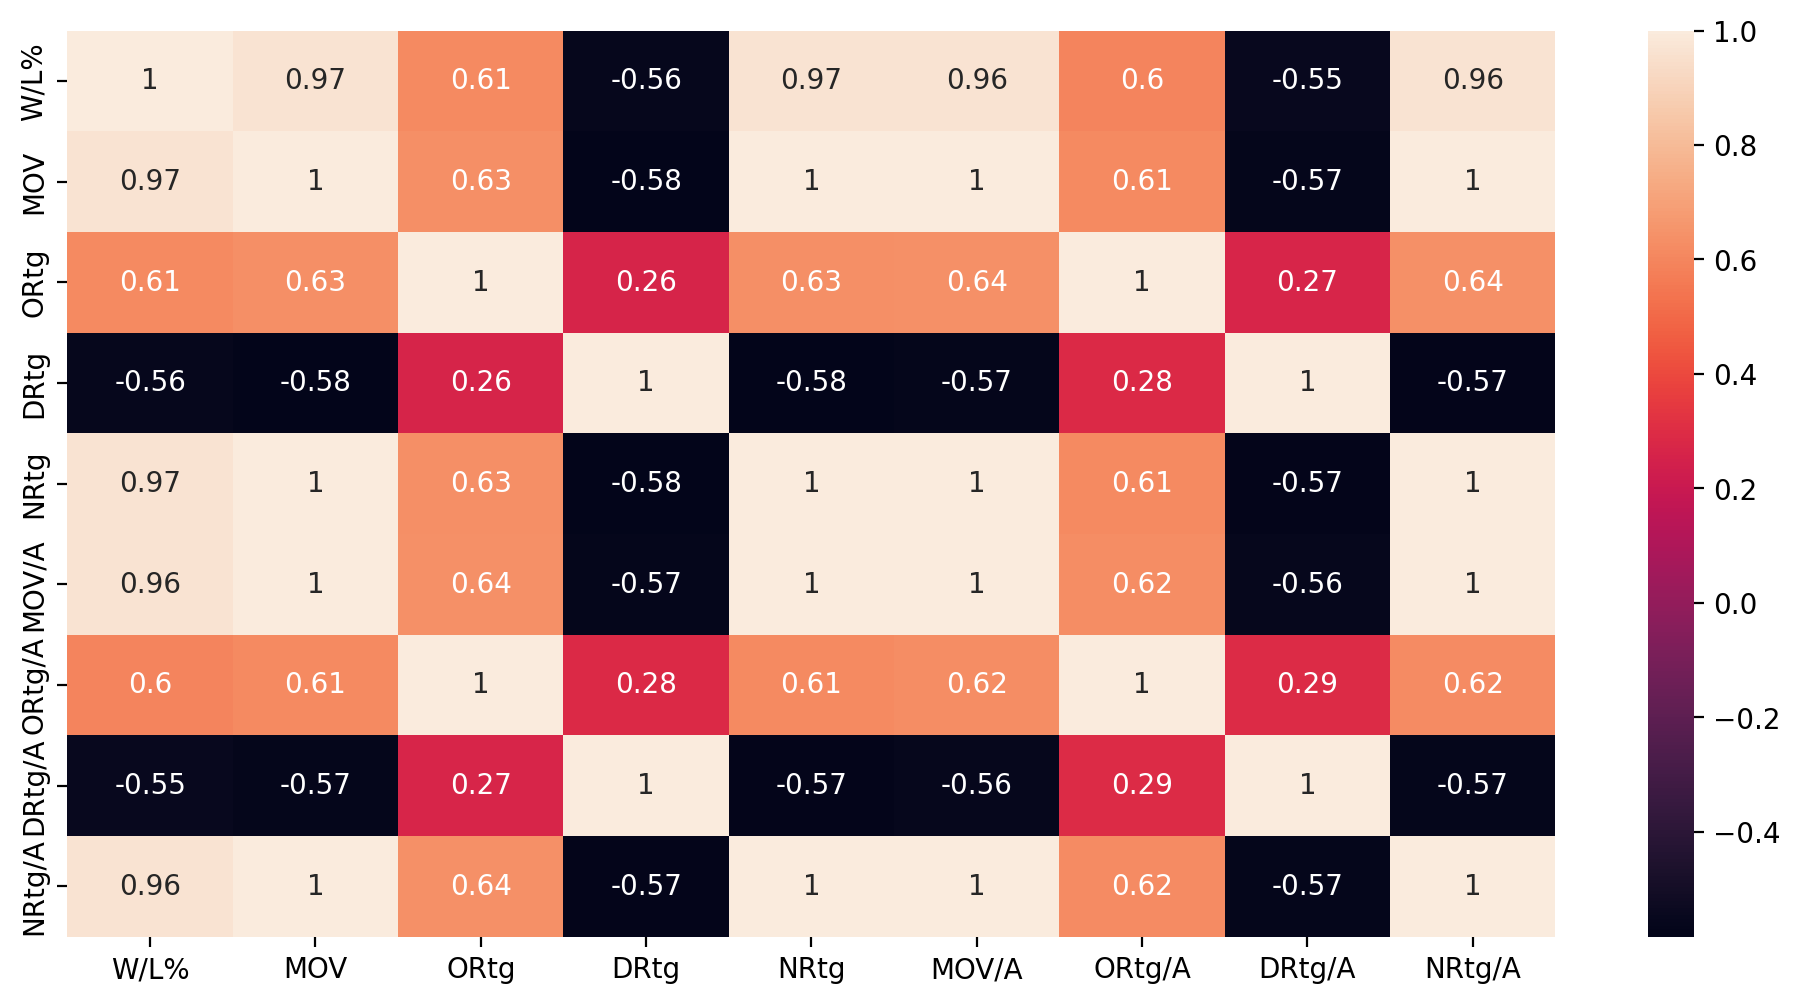

In [5]:
plt.figure(figsize = (12,6), dpi = 200)
sns.heatmap(df.corr(), annot = True)
# Categories closer to 1 or -1 will have a greater effect on the ML model

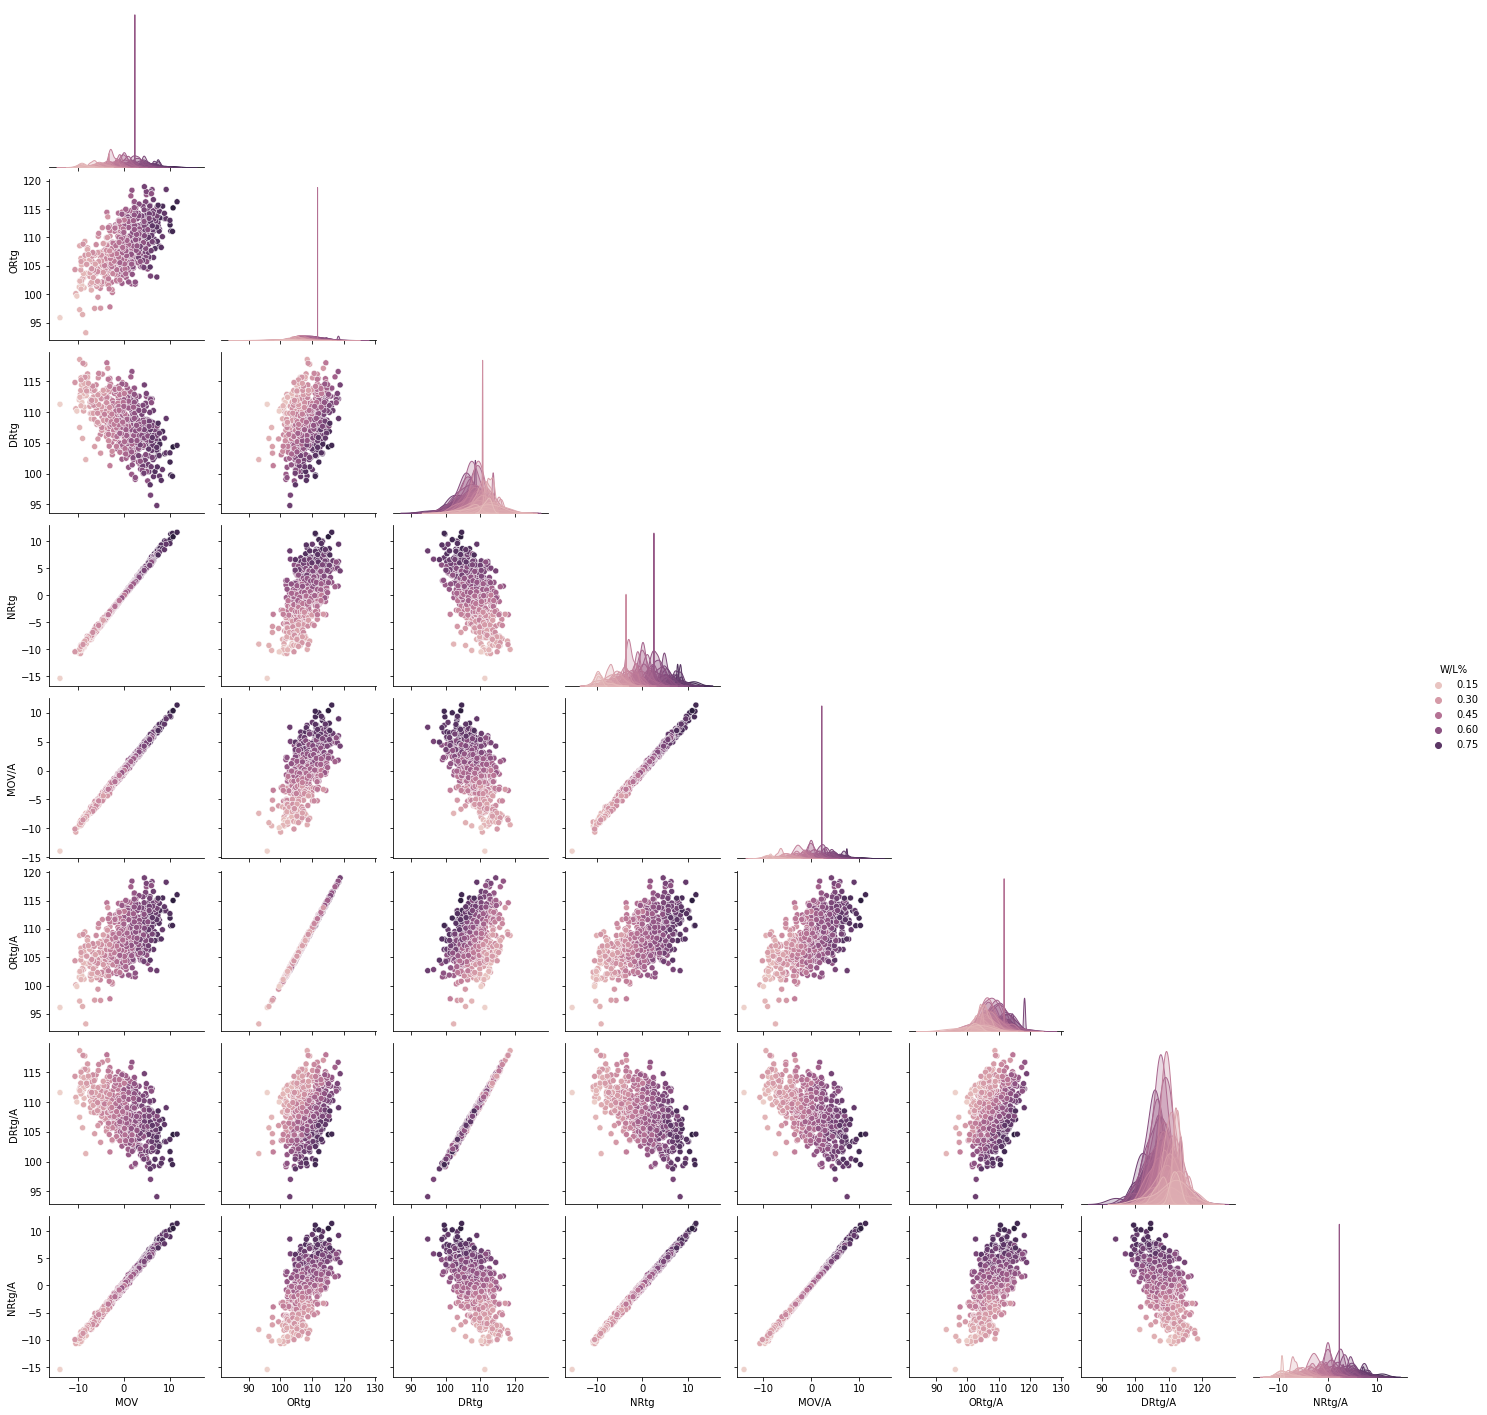

In [6]:
sns.pairplot(df, hue = "W/L%", corner = True) # Those with low and high win percentages are clearly separated
# Thus, the Machine learning model shpuld be highly predictive

In [7]:
df_two = df.copy()
pd.set_option('mode.chained_assignment', None)
df_two["Winning Record"] = ""

for i in range(len(df_two)):
    if df_two["W/L%"].iloc[i] >= 0.5:
        df_two["Winning Record"].iloc[i] = "Yes"
    elif df_two["W/L%"].iloc[i] < 0.5:
        df_two["Winning Record"].iloc[i] = "No"
df_two

,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Winning Record
0,0.732,7.78,111.43,102.89,8.54,7.91,111.52,102.85,8.67,Yes
1,0.720,6.50,106.45,99.50,6.95,6.68,106.36,99.20,7.16,Yes
2,0.732,5.41,106.25,100.29,5.96,5.65,106.20,99.99,6.22,Yes
3,0.598,5.22,104.42,98.80,5.62,4.42,103.93,99.18,4.75,Yes
4,0.610,3.68,104.84,100.71,4.14,2.98,104.48,101.11,3.36,Yes
...,...,...,...,...,...,...,...,...,...,...
593,0.280,-7.72,106.96,114.67,-7.71,-7.35,107.02,114.36,-7.34,No
594,0.268,-8.00,105.25,113.25,-8.00,-7.67,105.16,112.82,-7.66,No
595,0.293,-8.10,105.25,113.42,-8.18,-7.90,105.18,113.16,-7.98,No
596,0.244,-8.48,109.28,117.77,-8.49,-8.26,109.47,117.75,-8.28,No


<AxesSubplot: xlabel='Winning Record', ylabel='count'>

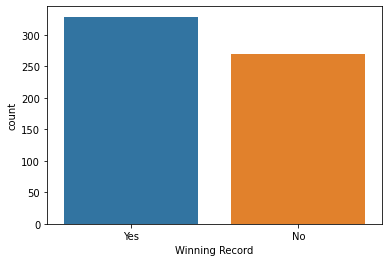

In [8]:
sns.countplot(data = df_two, x = "Winning Record") 
# Nearly a equal amount of winning (>0.500) and losing (<0.500) records indicating a roughly balanced dataset

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

X = df.drop("W/L%", axis = 1)
y = df["W/L%"]

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=101)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
n_neighbors = list(range(1,100))
weights = ['uniform', 'distance']
metric = ["euclidean", "manhattan", "minkowski"]
param_grid = {"n_neighbors":n_neighbors, "weights":weights, "metric":metric}
grid = GridSearchCV(model, param_grid, n_jobs = -1)

In [12]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']})

In [13]:
y_pred = grid.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.036527312127365735

In [15]:
mean_absolute_error(y_test, y_pred)

0.03035

In [16]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}

In [17]:
model = KNeighborsRegressor(n_neighbors = 16, metric = "manhattan", weights = "uniform")

In [18]:
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=16)

In [19]:
from sklearn.svm import SVR

In [20]:
svr_model = SVR()

In [21]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [1,2,3,4,5]
C = [0.01, 0.1, 1, 10, 100]
param_grid = {"kernel":kernel, "degree":degree, "C":C}

In [22]:
grid = GridSearchCV(svr_model, param_grid, n_jobs = -1)

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [24]:
grid.best_params_

{'C': 10, 'degree': 1, 'kernel': 'poly'}

In [25]:
svr_model = SVR(C = 10,kernel = "poly",  degree  = 1)
svr_model.fit(X_train, y_train)

SVR(C=10, degree=1, kernel='poly')

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
random_forest_model = RandomForestRegressor()

In [28]:
max_features = ["sqrt", "log2"]
n_estimators = [1,10,100, 500, 1000]
param_grid = {"max_features":max_features, "n_estimators":n_estimators}

In [29]:
grid = GridSearchCV(random_forest_model, param_grid, n_jobs = -1)

In [30]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 10, 100, 500, 1000]})

In [31]:
grid.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [32]:
random_forest_model = RandomForestRegressor(max_features = "sqrt", n_estimators = 1000)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000)

In [33]:
from sklearn.linear_model import ElasticNet

In [34]:
en_model = ElasticNet()
alpha = [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
l1_ratio = [0.001, 0.1, 0.5, 0.9, 0.99, 1]
param_grid = {"alpha":alpha, "l1_ratio":l1_ratio}

In [35]:
grid = GridSearchCV(en_model, param_grid, n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   1000],
                         'l1_ratio': [0.001, 0.1, 0.5, 0.9, 0.99, 1]})

In [36]:
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.001}

In [37]:
en_model = ElasticNet(alpha = 0.01, l1_ratio = 0.001, max_iter = 1000000)
# nearly Ridge Regression 
en_model.fit(X_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.001, max_iter=1000000)

In [38]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [39]:
from sklearn.ensemble import AdaBoostRegressor

In [40]:
ada_model = AdaBoostRegressor()
n_estimators = [1,5, 10, 50, 100, 1000]
learning_rate = [0.01, 0.1, 0.5, 0.7, 0.9, 1]
param_grid = {"n_estimators":n_estimators, "learning_rate":learning_rate}
grid = GridSearchCV(ada_model, param_grid, n_jobs = -1)

In [41]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.7, 0.9, 1],
                         'n_estimators': [1, 5, 10, 50, 100, 1000]})

In [42]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [43]:
ada_model = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 50)
ada_model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1)

In [44]:
def pred_model(model):
    print(model)
    y_pred = model.predict(X_test)
    # Root Mean Squared Error
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # Mean Absolute Error
    print("MAE:", mean_absolute_error(y_test, y_pred))

In [45]:
pred_model(model) 

KNeighborsRegressor(metric='manhattan', n_neighbors=16)
RMSE: 0.036527312127365735
MAE: 0.03035


In [46]:
pred_model(svr_model)

SVR(C=10, degree=1, kernel='poly')
RMSE: 0.03510174111783987
MAE: 0.029122251095715573


In [47]:
pred_model(random_forest_model)

RandomForestRegressor(max_features='sqrt', n_estimators=1000)
RMSE: 0.039305840390031946
MAE: 0.031700266666666796


In [48]:
pred_model(en_model) 

ElasticNet(alpha=0.01, l1_ratio=0.001, max_iter=1000000)
RMSE: 0.032720335394563295
MAE: 0.026537296750896368


In [49]:
pred_model(lin_model) 
# while the lin model has the best metrics,
# these values are only valid if the test data values is in the same scale
# Since the goal is to determine win pct of mid season data, this is not the
# best model

LinearRegression()
RMSE: 0.03207849518268192
MAE: 0.026005954615432265


In [50]:
pred_model(ada_model)

AdaBoostRegressor(learning_rate=0.1)
RMSE: 0.03496492047155641
MAE: 0.0300171927392283


In [51]:
X_scale = scale.fit_transform(X)
en_model = ElasticNet(alpha = 0.01, l1_ratio = 0.001, max_iter = 1000000)
# nearly Ridge Regression 
en_model.fit(X_scale, y)

ElasticNet(alpha=0.01, l1_ratio=0.001, max_iter=1000000)

In [52]:
from joblib import dump, load

In [53]:
dump(en_model, "C:\\Users\\ganes\\Downloads\\final_NBA_win_pct_model.joblib")

['C:\\Users\\ganes\\Downloads\\final_NBA_win_pct_model.joblib']

In [54]:
dump(scale, "C:\\Users\\ganes\\Downloads\\final_NBA_win_pct_model_scaler.joblib")

['C:\\Users\\ganes\\Downloads\\final_NBA_win_pct_model_scaler.joblib']

In [55]:
print("Since the Elastic Net model has the lowest MAE and RMSE, it should perform the best upon testing on new datasets.")

Since the Elastic Net model has the lowest MAE and RMSE, it should perform the best upon testing on new datasets.
